Covid19 Data Analysis 
------------------------------------------------------------------------------------------------------------------------------

### Step 1

Importing the modules

In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Step 2
Importing the databases need for data analysis as a dataframe, with relevant object name.

In [118]:
covid=pd.read_csv("covid19_Confirmed_dataset.csv")
covid.head()

#Columns with dates show the cumulative count of that location on that particular date
#Data ranges from 22 Jan 2020 to 30 April 2020

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Step 3
Checking the shape of the dataframe

In [65]:
covid.shape

(266, 104)

### Step 4
Delete the useless columns

In [66]:
#covid1 = covid.drop(['Lat','Long'],axis=1)
#covid1.head()

#The new dataframe saved in covid1 will be a COPY of the covid dataframe.

In [67]:
#covid.head()
# The dataframe reffered by covid will still have the original dataframe without the dropped columns

In [68]:
#But if want to make the change in covid only, and not make copy, use para 'inplace=True'
covid.drop(['Lat','Long'],axis=1,inplace=True)

In [116]:
covid.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Step 5
Aggregrating rows by country


In [70]:
# Province/State of some countries is NaN. so, to solve that issue, do following
covid_agg=covid.groupby('Country/Region').sum()

In [117]:
covid_agg.head(5)
# So this is CUMMULATIVE of all the PROVINCE/STATE of a country. i.e a country's value is the sum total of all its provinces
# Eg- all the provinces of australia are added to show just the count of the whole country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection _rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [76]:
covid_agg.shape
# Here 187 different countries are there, and a 100 days of dates

(187, 100)

### Step 6
Visualizing data related to a country for example China

visualization always helps for better understanding of our data.

In [78]:
# we will use the new cleaned dataframe to do visualization
covid_agg.loc['China']
# This will give details of all the colums of index titles 'China'

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

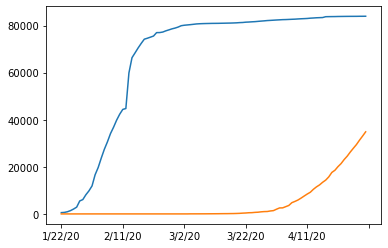

In [82]:
# Thien to plot it just add .plot
covid_agg.loc['China'].plot()

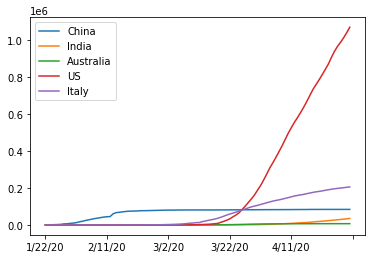

In [85]:
# Add mulptiple countries to compare their plots
covid_agg.loc['China'].plot()
covid_agg.loc['India'].plot()
covid_agg.loc['Australia'].plot()
covid_agg.loc['US'].plot()
covid_agg.loc['Italy'].plot()

#But the problem  with this is that we dont know which is which. so add legend
plt.legend()

### Step 7 
Calculating a good measure

we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

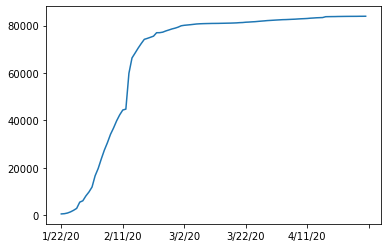

In [86]:
# This is spread from 22 jan to 11 april
covid_agg.loc['China'].plot()

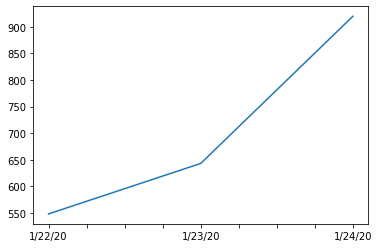

In [90]:
# To get graph over a shorter period of time, eg. 3 days
covid_agg.loc['China'][:3].plot()

# As seen, on 22 there were 550 cases. 24 hrs later, there were 650 cases
# so this shows a rise of 100 cases in 24 hrs

### Step 8
Caculating the first derivative of the curve, i.e getting the maximun no. of cases in our periodof time

Derivative means the RATE of the curve. i.e the rate of the growth of the covid cases

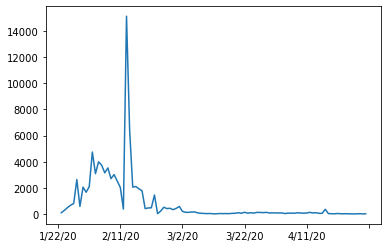

In [91]:
covid_agg.loc['China'].diff().plot()
# This shows day by day changes in infection rates, and we want the max
# diff() shows the difference of each day, i.e shows the no. of new cases each 24 hrs

### task 3.2: find maxmimum infection rate for China

In [93]:
covid_agg.loc['China'].diff().max()
# This is the maximum recorded new cases in one day 

15136.0

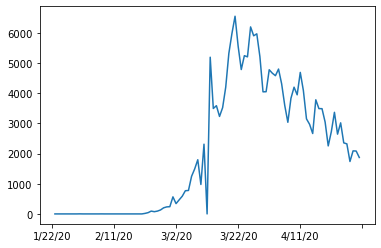

In [96]:
covid_agg.loc['Italy'].diff().plot()


In [98]:
covid_agg.loc['Italy'].diff().max()


6557.0

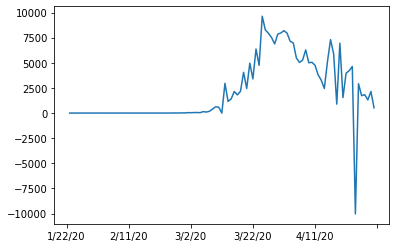

In [99]:
covid_agg.loc['Spain'].diff().plot()


In [100]:
covid_agg.loc['Spain'].diff().max()


9630.0

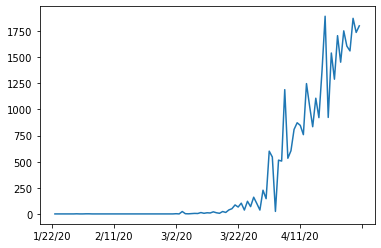

In [101]:
covid_agg.loc['India'].diff().plot()


In [102]:
covid_agg.loc['India'].diff().max()


1893.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [105]:
# List of name of all of the countries
# in the covid_agg dataframe, countries column s the index, so directly get
countries = list(covid_agg.index)

# List of the maximun infection rate of each country
max_infection_rates=[]
for i in countries:
    max_infection_rates.append(covid_agg.loc[i].diff().max())
#max_infection_rates

# now add this list in the  covid_agg dataset
# It will be added at the end of covid_agg
covid_agg['max_infection _rates'] = max_infection_rates

In [109]:
# column added at the end of the table, and table shape also shows one more added row
covid_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection _rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column 
Dont need the dates waala columns, so we remove

In [110]:
covid_data = pd.DataFrame(covid_agg['max_infection _rates'])

In [112]:
covid_data.head()
# this will also include the country column as it is index, and not a different row

,max_infection _rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [114]:
happy = pd.read_csv('worldwide_happiness_report.csv')

In [115]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [120]:
useless_cols = ['Overall rank','Score','Generosity','Perceptions of corruption']

In [121]:
happy.drop(useless_cols,axis=1,inplace=True)

In [122]:
happy.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [124]:
# make name of country as index as it is index in covid_data too
# having same index will make it easy to join the dataframes later
happy.set_index('Country or region',inplace=True)

In [125]:
happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [126]:
covid_data.head()

,max_infection _rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [128]:
covid_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [129]:
happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [130]:
happy.shape

(156, 4)

In [131]:
# number of countries in covid_data>happy
# so we will have to do inner join
data = covid_data.join(happy,how="inner")m

In [132]:
data.head()
# column title of index, i.e country name

,max_infection _rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [136]:
#higher the value, more the correlation
data.corr()
# we can see that there is a positive correlation rate betweeen max_infection_rate and the other columns

,max_infection _rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection _rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [135]:
data.head()

,max_infection _rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

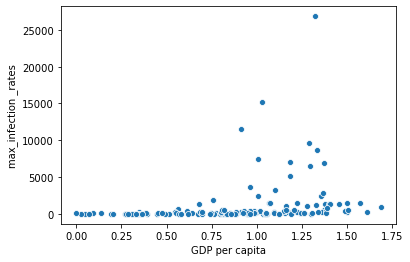

In [137]:
# the independent variable is on the x axis
# the dependant variable is on the y axis
x = data["GDP per capita"]
y = data["max_infection _rates"]
sns.scatterplot(x,y)

# this plot shows direct proportionality, but we cannot se enough details
# the reason is that the scale of x and y is quite different

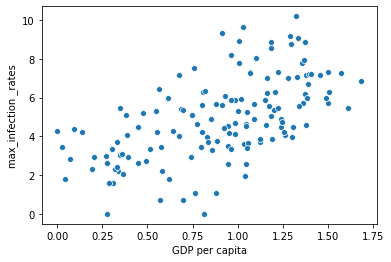

In [139]:
# to solve the above issue, we can use log scaling to y
x = data["GDP per capita"]
y = data["max_infection _rates"]
sns.scatterplot(x,np.log(y))


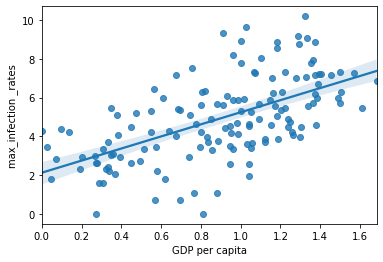

In [140]:
# another plot for better vizualization
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

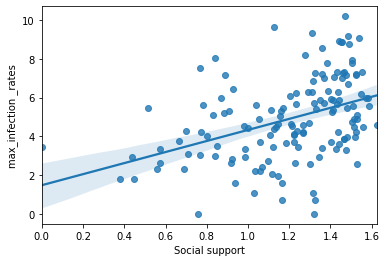

In [142]:
x = data["Social support"]
y = data["max_infection _rates"]
sns.regplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

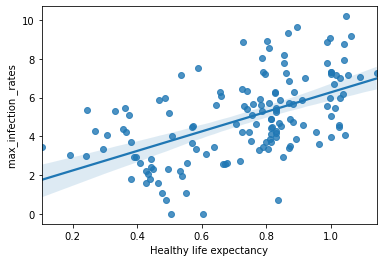

In [143]:
x = data["Healthy life expectancy"]
y = data["max_infection _rates"]
sns.regplot(x,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

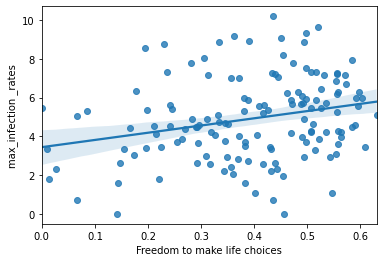

In [144]:
x = data["Freedom to make life choices"]
y = data["max_infection _rates"]
sns.regplot(x,np.log(y))